In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #library for making statistical graphics in python
from sklearn.metrics import classification_report #measures the quality of predictions
from sklearn import metrics 
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import warnings
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv(r"C:\Users\Manasa Adabala\Desktop\VI sem\ML project\Crop_recommendation.csv")

In [36]:
Temp = df["temperature"].values
Rain = df["rainfall"].values

In [37]:
df.head()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [38]:
df.tail()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [39]:
df.size

17600

In [40]:
df.shape

(2200, 8)

In [41]:
df.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [42]:
df['label'].unique

<bound method Series.unique of 0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object>

In [43]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [44]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [45]:
df.dtypes

Nitrogen         int64
Phosphorous      int64
Potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [46]:
df.describe()

,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [47]:
features = df[['Nitrogen', 'Phosphorous','Potassium','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [48]:
acc = []
model = []

In [49]:
#split data arrays into training data and test data set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [50]:
print(Xtest)

      Nitrogen  Phosphorous  Potassium  temperature   humidity        ph  \
2121        83           21         28    25.567483  60.492446  7.466901   
960          1           27         36    23.985988  93.342366  5.684995   
952         23            5         44    21.207254  94.263047  7.163005   
1958       116           52         19    22.942767  75.371706  6.114526   
681          6           37         17    28.086572  80.350059  6.760694   
...        ...          ...        ...          ...        ...       ...   
1684         7           17         10    10.164313  91.223210  6.465913   
1477        86           18         45    28.965866  90.718329  6.566759   
851          6           64         23    23.335652  67.404607  7.065264   
370         37           56         25    22.055923  19.603793  5.774755   
2010        89           53         44    24.886928  71.917115  7.319735   

        rainfall  
2121  190.225784  
960   104.991282  
952   107.566080  
1958   67.0

In [51]:
print(Ytest)

2121         coffee
960     pomegranate
952     pomegranate
1958         cotton
681        mungbean
           ...     
1684         orange
1477      muskmelon
851          lentil
370     kidneybeans
2010           jute
Name: label, Length: 440, dtype: object


In [52]:
print(Xtrain)

      Nitrogen  Phosphorous  Potassium  temperature   humidity        ph  \
1936       113           38         25    22.000851  79.472710  7.388266   
610         28           35         22    29.530376  86.733460  7.156563   
372         11           61         21    18.623288  23.024103  5.532101   
1559        29          139        205    23.641424  93.744615  6.155939   
1500        24          128        196    22.750888  90.694892  5.521467   
...        ...          ...        ...          ...        ...       ...   
1071       105           88         54    25.787498  84.511942  6.020445   
433         27           71         23    23.453790  46.487148  7.109598   
674         23           39         22    29.256493  81.979522  6.864839   
1099       117           81         53    29.507046  78.205856  5.507642   
1608        39           24         14    30.554726  90.903438  7.189260   

        rainfall  
1936   90.422242  
610    59.872321  
372   135.337803  
1559  116.6

In [53]:
print(Ytrain)

1936         cotton
610        mungbean
372     kidneybeans
1559          apple
1500          apple
           ...     
1071         banana
433      pigeonpeas
674        mungbean
1099         banana
1608         orange
Name: label, Length: 1760, dtype: object


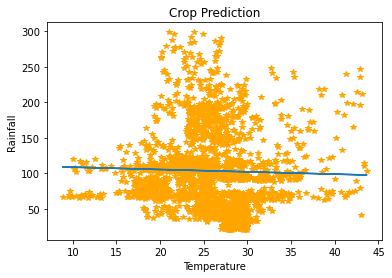

<AxesSubplot:xlabel='temperature', ylabel='rainfall'>

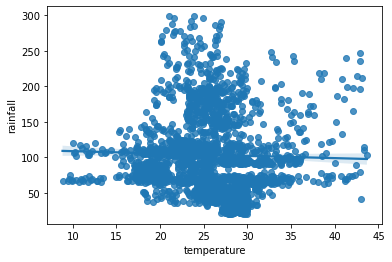

In [54]:
x= df["temperature"]
y=df["rainfall"]
plt.title("Crop Prediction")
plt.xlabel("Temperature")
plt.ylabel("Rainfall")
m,b = np.polyfit(x,y,1)
plt.plot(x, y, '*', color='orange')
plt.plot(x, m*x+b)
plt.show()
sns.regplot(x,y)

In [55]:
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

In [56]:
from sklearn.tree import DecisionTreeClassifier
#criterion: split quality
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest) 
x = metrics.accuracy_score(Ytest, predicted_values)#set of values predicted in sample must match the corres set of labels
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [57]:
from sklearn.ensemble import RandomForestClassifier
#estimators:no of trees in forest. 
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00  

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

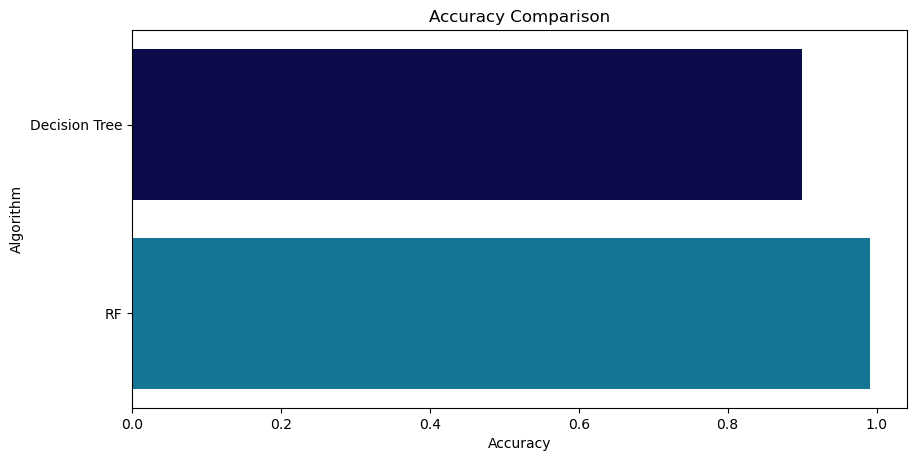

In [58]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='ocean')

In [59]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
RF --> 0.990909090909091


In [60]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = DecisionTree.predict(data)
print(prediction)

['jute']


In [61]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [62]:
data = np.array([[100, 18, 30, 67.603016, 60.3, 26.7, 140.91 ]])
prediction = DecisionTree.predict(data)
print(prediction)

['coffee']


In [63]:
data = np.array([[100, 18, 30, 67.603016, 60.3, 26.7, 140.91 ]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [64]:
data = np.array([[10, 18, 30, 97.603016, 60.3, 6.7, 140.91 ]])
prediction = RF.predict(data)
print(prediction)

['mango']


In [65]:
data = np.array([[10, 18, 30, 28.603016, 60.3, 26.7, 140.91 ]])
prediction = RF.predict(data)
print(prediction)

['coconut']


In [66]:
data = np.array([[10, 18, 30, 97.603016, 60.3, 6.7, 140.91 ]])
prediction = DecisionTree.predict(data)
print(prediction)

['mango']


In [67]:
data = np.array([[100, 18, 30, 67.603016, 60.3, 26.7, 140.91 ]])
prediction = DecisionTree.predict(data)
print(prediction)

['coffee']


In [68]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = DecisionTree.predict(data)
print(prediction)

['jute']
